In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [2]:
fashion = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test, y_test) =fashion.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_valid, X_train = X_train_full[:5000]/255. , X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test/255.

In [6]:
X_valid.shape

(5000, 28, 28)

Types of Category of Fashion


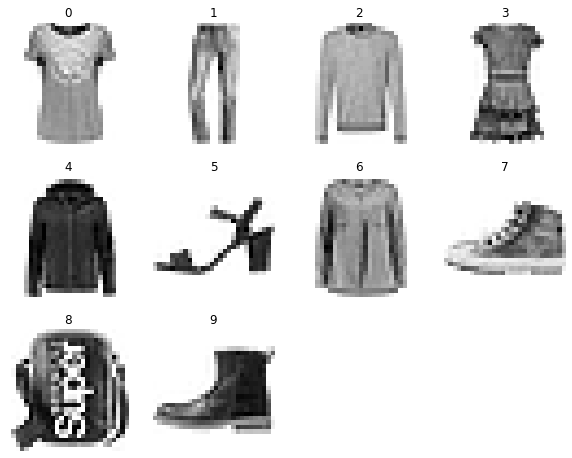

In [8]:
# lets  visualize the dataset

print("Types of Category of Fashion")
plt.figure(figsize=(10,8))

for i in range(10):
    index = np.where(y_train == i)
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[index[0][0]], cmap='binary')
    plt.title(i)
    plt.axis("off")
  
plt.show()

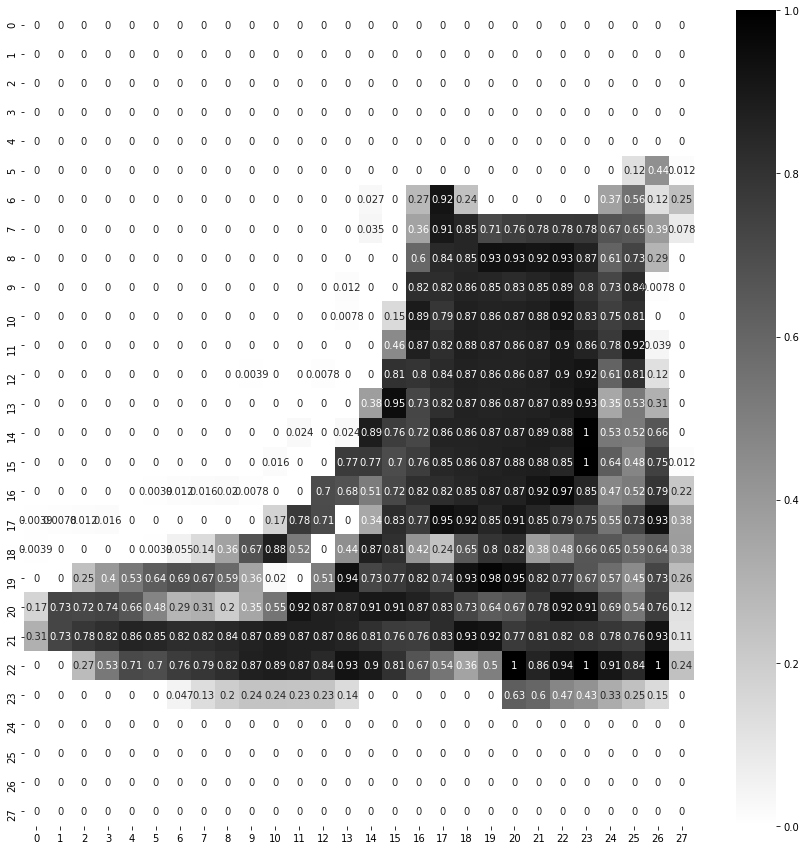

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[5],annot=True, cmap='binary')

In [10]:
y_train[5]

9

In [11]:
Layers = [tf.keras.layers.Flatten(input_shape=[28,28], name = "inputlayer"),
          tf.keras.layers.Dense(300, activation='relu', name = "hiddenlayer1"),
          tf.keras.layers.Dense(100, activation='relu', name = 'hiddenlayer2'),
          tf.keras.layers.Dense(50, activation='relu', name = 'hiddenlayer3'),
          tf.keras.layers.Dense(10, activation='softmax', name = "outputlayer")
          ]

In [12]:
model_cf = tf.keras.models.Sequential(Layers)

In [13]:
model_cf.layers

In [14]:
model_cf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputlayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenlayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenlayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
hiddenlayer3 (Dense)         (None, 50)                5050      
_________________________________________________________________
outputlayer (Dense)          (None, 10)                510       
Total params: 271,160
Trainable params: 271,160
Non-trainable params: 0
_________________________________________________________________


Lets see the weights of hidden layer

In [15]:
hidden2 = model_cf.layers[2]
hidden2.name

'hiddenlayer2'

In [16]:
hidden2.get_weights()

[array([[ 0.06230833, -0.07422671, -0.10284603, ...,  0.07439186,
         -0.08247682,  0.03856292],
        [-0.07680441, -0.02567494, -0.0790274 , ...,  0.05597431,
         -0.08012098,  0.02306681],
        [-0.01474604, -0.07869492,  0.08856907, ...,  0.03868865,
         -0.07995217, -0.09752154],
        ...,
        [-0.10426907,  0.01655621,  0.08760872, ...,  0.08479408,
         -0.06847918,  0.00666396],
        [-0.05975197, -0.06157036,  0.0722939 , ..., -0.09733277,
         -0.10886223, -0.04739536],
        [-0.04353775,  0.05915182,  0.05876865, ..., -0.00681337,
          0.10815544,  0.11459861]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [17]:
weights, biases = hidden2.get_weights()

In [18]:
weights.shape

(300, 100)

In [19]:
biases.shape

(100,)

In [24]:
from tensorflow.keras.optimizers import SGD

Loss_function = "sparse_categorical_crossentropy"
optimizer = SGD(learning_rate=0.01)
metrics = "accuracy"

model_cf.compile(loss=Loss_function, optimizer=optimizer, metrics=metrics)

In [25]:
Epoches = 20
Validation_set = (X_valid, y_valid)

history = model_cf.fit(X_train, y_train, epochs = Epoches, validation_data = Validation_set, batch_size=32)

Epoch 1/20
1719/1719 [==============================] - 9s 4ms/step - loss: 0.7423 - accuracy: 0.7535 - val_loss: 0.4824 - val_accuracy: 0.8356
Epoch 2/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4814 - accuracy: 0.8313 - val_loss: 0.4284 - val_accuracy: 0.8540
Epoch 3/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4357 - accuracy: 0.8462 - val_loss: 0.4078 - val_accuracy: 0.8594
Epoch 4/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4049 - accuracy: 0.8561 - val_loss: 0.3936 - val_accuracy: 0.8620
Epoch 5/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3825 - accuracy: 0.8655 - val_loss: 0.3757 - val_accuracy: 0.8680
Epoch 6/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3655 - accuracy: 0.8699 - val_loss: 0.3648 - val_accuracy: 0.8732
Epoch 7/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3501 - accuracy: 0.8750 - val_loss: 0.3494 - val_accuracy:

In [26]:
model_cf.save('fashion.h5')

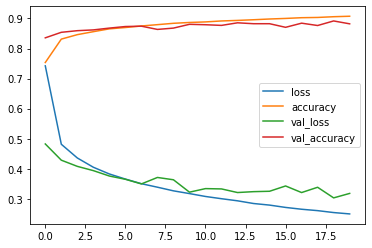

In [28]:
pd.DataFrame(history.history).plot()

In [29]:
model_cf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3627 - accuracy: 0.8662


[0.36272984743118286, 0.8661999702453613]

In [30]:
X_test[0:1].shape

(1, 28, 28)

In [31]:
X_new = X_test[0:1]
y_pred = model_cf.predict(X_new)
y_pred.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.008, 0.   , 0.003, 0.   ,
        0.989]], dtype=float32)

In [32]:
y_pred = np.argmax(y_pred, axis=1)
y_pred


array([9], dtype=int64)

In [33]:
y_test_new = y_test[0]
y_test_new

9